In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("placement.csv")
df.sample(8)

,cgpa,placement_exam_marks,placed
605,6.64,42.0,0
853,7.74,22.0,0
826,7.05,32.0,0
584,6.57,60.0,1
426,7.26,21.0,0
623,7.35,14.0,1
336,7.93,9.0,1
998,8.62,46.0,1


C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_2848\3779232219.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


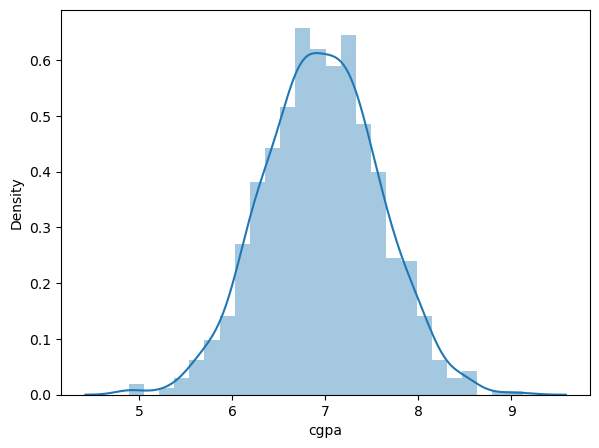

In [8]:
# normal distribution fr cgpa and marks

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.show()

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_2848\3850273562.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


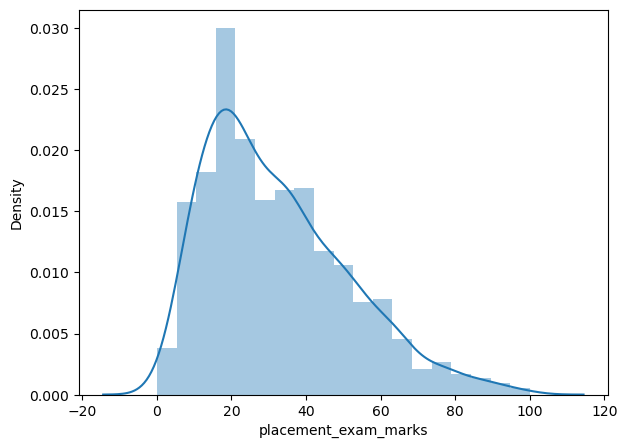

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [11]:
df.describe()['cgpa']

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [13]:
# boundary values +3sigma -3sigma
print("highest val",df['cgpa'].mean() + 3*df['cgpa'].std())
print("lowest val",df['cgpa'].mean() -3*df['cgpa'].std())

highest val 8.808933625397168
lowest val 5.113546374602832


In [15]:
# finding outliers
#if cgpa column has any value greater than 8.80, consider it as an outlier
# if any value smaller than 5.11 is found, consider it as an outlier.
df[(df["cgpa"] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [16]:
# method 2, find z_score values for cgpa then compare it with two extremes -3sigma and +3sigma
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
#the formula to find z-score is xi` = xi - meow / sigma, where xi is any original value, meow is mean of the dataset and sigma is std deviation

In [17]:
df.head(8)

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
5,7.30,23.0,1,0.550026
6,6.69,11.0,0,-0.440398
7,7.12,39.0,1,0.257770


In [28]:
# now compare each z-score with extremes
#trimming
df[(df['cgpa_zscore'] > 3 ) | (df['cgpa_zscore'] < -3)]


,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [31]:
#trimming
df_new=df[(df['cgpa_zscore'] < 3 ) & (df['cgpa_zscore'] > -3)]
df_new.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


### capping
capping refers to cap or constraint the values if it cross the extremes/boundary values

In [34]:
# boundary values +3sigma -3sigma
upper_limit=df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit=df['cgpa'].mean() -3*df['cgpa'].std()

In [35]:
lower_limit

5.113546374602832

In [36]:
upper_limit

8.808933625397168

In [37]:
df['cgpa']=np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(df['cgpa']<lower_limit,
            lower_limit,
            df['cgpa'])
)

In [38]:
df.head(8)

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
5,7.30,23.0,1,0.550026
6,6.69,11.0,0,-0.440398
7,7.12,39.0,1,0.257770


In [41]:
df['cgpa'].shape


(1000,)

In [42]:
#in capping the values aren't removed but replaced by the extremes if reached certain threshold, boundary values in this case